<a href="https://colab.research.google.com/github/proygit/DMT/blob/main/DMT_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [ ]:
# Change the working directory to the desired folder
os.chdir('/content/drive/MyDrive/DMT-Collab/dmt-data')

# List the contents of the current working directory
contents = os.listdir()

# Print the contents
print(contents)
# Read in the Excel file
data_df = pd.read_excel('ODI-2023.xlsx')

# Create a copy of the DataFrame
df_cp = data_df.copy()

# Get the shape of the DataFrame
print(df_cp.shape)
df_cp.columns
df_cp.describe()

['ODI-2023.xlsx', 'DMT.csv']
(305, 17)


<ipython-input-334-01e230a85164>:18: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cp.describe()


,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
count,305,305,305,305.0,305,305,305,305,305,305.0,305,304.0,305.0,305.0,305,305,304
unique,302,129,3,3.0,3,3,6,3,292,107.0,3,76.0,36.0,137.0,125,209,246
top,2023-04-04 12:11:08.480000,AI,yes,0.0,mu,ja,male,yes,14-05-1999,400.0,no,50.0,4.0,7.0,23:30,Sun,Good food
freq,2,43,221,189.0,259,168,154,192,3,39.0,276,21.0,37.0,24.0,19,15,10
first,2023-04-04 12:08:33.342000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-04-04 12:28:05.558000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cp.to_csv('DMT.csv',index =False, sep=',', header=True)
# Print the first few rows of the DataFrame
df_csv = pd.read_csv('DMT.csv')
df_csv_ver1 =df_csv[[#'Tijdstempel', 
        #'What programme are you in?',
       #'Have you taken a course on machine learning?',
       #'Have you taken a course on information retrieval?',
       #'Have you taken a course on statistics?',
       #'Have you taken a course on databases?', 
        'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
      # 'When is your birthday (date)?',
       #'How many students do you estimate there are in the room?',
       #'Did you stand up to come to your previous answer    ?',
       #'What is your stress level (0-100)?',
       #'How many hours per week do you do sports (in whole hours)? ',
       #'Give a random number', 
        #'Time you went to bed Yesterday',
       #'What makes a good day for you (1)?',
       #'What makes a good day for you (2)?'
       ]].iloc[:, :17]
df_csv_ver1.shape

(305, 2)

In [ ]:
# Rename the column since its too long 
df_csv_ver1 = df_csv_ver1.rename(columns={'I have used ChatGPT to help me with some of my study assignments ': 'Used ChatGPT?'})
df_csv_ver1 = df_csv_ver1.rename(columns={'What is your gender?': 'Gender'})
#check values of Gender if there are Male or Female or anything else
df_csv_ver1['Gender'].value_counts()
# if the values are not male or female convert them to NaN
mask = ~ df_csv_ver1['Gender'].isin(['male', 'female'])
df_csv_ver1.loc[mask, 'Gender'] = np.nan
# drop the NaN row values 
df_csv_ver1.dropna(inplace=True)

df_csv_ver1

#male =1, female =0 
#not willing to say = 1, no = 0,yes = 2

,Gender,Used ChatGPT?
1,male,not willing to say
2,female,no
3,male,yes
4,male,yes
5,female,yes
...,...,...
299,male,not willing to say
300,male,no
301,female,no
303,male,not willing to say


In [ ]:

#Convert categorial to numeric values
le = LabelEncoder()
df_csv_ver1['Gender'] = le.fit_transform(df_csv_ver1['Gender'])
df_csv_ver1['Used ChatGPT?'] = le.fit_transform(df_csv_ver1['Used ChatGPT?'])
df_csv_ver1

,Gender,Used ChatGPT?
1,1,1
2,0,0
3,1,2
4,1,2
5,0,2
...,...,...
299,1,1
300,1,0
301,0,0
303,1,1


In [ ]:
df_cp.to_csv('DMT.csv',index =False, sep=',', header=True)
# Print the first few rows of the DataFrame
df_csv_ver2 = pd.read_csv('DMT.csv')
df_csv_ver2 =df_csv[[#'Tijdstempel', 
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 
        'What is your gender?',
       'I have used ChatGPT to help me with some of my study assignments ',
      # 'When is your birthday (date)?',
       #'How many students do you estimate there are in the room?',
       #'Did you stand up to come to your previous answer    ?',
       #'What is your stress level (0-100)?',
       #'How many hours per week do you do sports (in whole hours)? ',
       #'Give a random number', 
        #'Time you went to bed Yesterday',
       #'What makes a good day for you (1)?',
       #'What makes a good day for you (2)?'
       ]].iloc[:, :17]
df_csv_ver2

,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments
0,yes,0,mu,nee,gender fluid,yes
1,no,0,sigma,nee,male,not willing to say
2,no,0,mu,nee,female,no
3,yes,1,mu,ja,male,yes
4,no,0,mu,nee,male,yes
...,...,...,...,...,...,...
300,no,0,unknown,ja,male,no
301,yes,unknown,mu,nee,female,no
302,yes,0,mu,ja,gender fluid,no
303,yes,0,mu,nee,male,not willing to say


In [ ]:
#Remane the columns to a smaller name
df_csv_ver2 = df_csv_ver2.rename(columns={'What programme are you in?': 'Study Track','Have you taken a course on machine learning?':'taken ML before?'})
df_csv_ver2 = df_csv_ver2.rename(columns={'Have you taken a course on information retrieval?': 'taken IR before?','Have you taken a course on statistics?':'taken Statistics before?','Have you taken a course on databases?':'taken DB before?'})
df_csv_ver2= df_csv_ver2.rename(columns={'I have used ChatGPT to help me with some of my study assignments ': 'Used ChatGPT?'})
df_csv_ver2 = df_csv_ver2.rename(columns={'What is your gender?': 'Gender'})

df_csv_ver2

,taken ML before?,taken IR before?,taken Statistics before?,taken DB before?,Gender,Used ChatGPT?
0,yes,0,mu,nee,gender fluid,yes
1,no,0,sigma,nee,male,not willing to say
2,no,0,mu,nee,female,no
3,yes,1,mu,ja,male,yes
4,no,0,mu,nee,male,yes
...,...,...,...,...,...,...
300,no,0,unknown,ja,male,no
301,yes,unknown,mu,nee,female,no
302,yes,0,mu,ja,gender fluid,no
303,yes,0,mu,nee,male,not willing to say


In [ ]:
# Replace "unknown" with 0 in 'taken IR before?' column
df_csv_ver2['taken IR before?'] = df_csv_ver2['taken IR before?'].replace('unknown', 0)
# Replace "unknown" with "sigma" in 'taken Statistics before?' column
df_csv_ver2['taken Statistics before?'] = df_csv_ver2['taken Statistics before?'].replace('unknown', 'sigma')
#Apply LabelEncoding values 1=yes,mu and ja AND 0 = no,sigma,nee
le = LabelEncoder()
# Encode the 'yes' and 'no' values in the 'taken IR before?' column as binary 1 and 0, respectively
df_csv_ver2['taken ML before?'] = le.fit_transform(df_csv_ver2['taken ML before?'])
df_csv_ver2['taken Statistics before?'] = le.fit_transform(df_csv_ver2['taken Statistics before?'])
df_csv_ver2['taken DB before?'] = le.fit_transform(df_csv_ver2['taken DB before?'])
#check after cleaning
df_csv_ver2
#clean for Gender and UsedGPT

mask = ~ df_csv_ver2['Gender'].isin(['male', 'female'])
df_csv_ver2.loc[mask, 'Gender'] = np.nan
# drop the NaN row values 
df_csv_ver2.dropna(inplace=True)
df_csv_ver2['Gender'] = le.fit_transform(df_csv_ver2['Gender'])
df_csv_ver2['Used ChatGPT?'] = le.fit_transform(df_csv_ver2['Used ChatGPT?'])


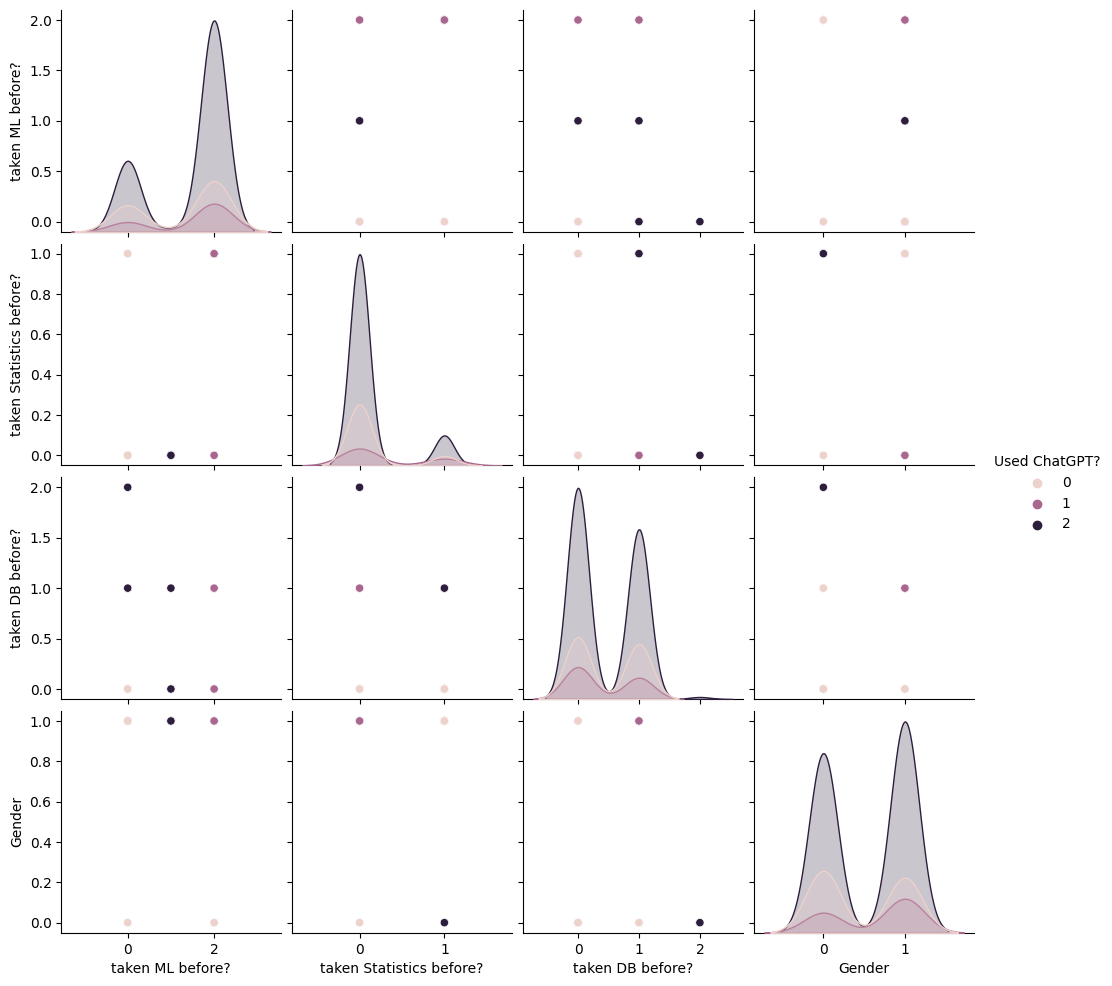

In [ ]:
#df_csv_ver2
import seaborn as sns
sns.pairplot(df_csv_ver2, hue='Used ChatGPT?')
#sns.pairplot(df_csv_ver2, hue='Gender')

In [ ]:
df_csv_ver2.shape

print(df_csv_ver2.isna().sum())
print(df_csv_ver2.isnull().sum())

taken ML before?            0
taken IR before?            0
taken Statistics before?    0
taken DB before?            0
Gender                      0
Used ChatGPT?               0
dtype: int64
taken ML before?            0
taken IR before?            0
taken Statistics before?    0
taken DB before?            0
Gender                      0
Used ChatGPT?               0
dtype: int64


# Scale the data,split for train and test

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define input features and target variable

# Select features and target variable
X = df_csv_ver2[['taken ML before?', 'taken IR before?', 'taken Statistics before?', 'taken DB before?','Gender']]
y = df_csv_ver2['Used ChatGPT?']

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_valid, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X = cpm_df_common.iloc[:,1:]
#y = pred_df_common['msi_status']
#
##  selected random state 42 so that now you get the same result each time you run the function
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.79, random_state=42)

## validation data is the same size as your test set, but you can make it a littler smaller to get some more training data
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42)

In [ ]:


# Instantiate and fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Use the model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

Accuracy: 0.5806451612903226
              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.00      0.00      0.00         3
           2       0.73      0.73      0.73        22

    accuracy                           0.58        31
   macro avg       0.34      0.35      0.34        31
weighted avg       0.57      0.58      0.58        31



In [ ]:
from sklearn import svm
# Scale data

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=4, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

Accuracy: 0.7096774193548387
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         3
           2       0.71      1.00      0.83        22

    accuracy                           0.71        31
   macro avg       0.24      0.33      0.28        31
weighted avg       0.50      0.71      0.59        31



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Instantiate and fit KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

Accuracy: 0.4838709677419355
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         6
           1       0.00      0.00      0.00         3
           2       0.68      0.59      0.63        22

    accuracy                           0.48        31
   macro avg       0.28      0.31      0.29        31
weighted avg       0.52      0.48      0.49        31



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
